In [1]:
import uproot
import pandas as pd
import numpy as np
pd.set_option('display.max_colwidth', None)

import hist
import matplotlib.pyplot as plt
import mplhep as hep
hep.style.use(hep.style.CMS)

In [13]:
with uproot.open("/data/userdata/aaarora/output/run2/sig_MVA.root") as f:
    df1 = f.get("Events").arrays(library="pd")

df1 = df1.sort_values(["event"]).reset_index(drop=True)

In [14]:
with uproot.open("/data/userdata/aaarora/output/run2/bkg_MVA.root") as f:
    df2 = f.get("Events").arrays(library="pd")

df2 = df2.sort_values(["event"]).reset_index(drop=True)

In [17]:
h1 = hist.Hist.new.Reg(100, 0, 1, name="SIG", label="SIG").Double()
h1.fill(df1.VBSBDTscore, weight=df1.weight)

h2 = hist.Hist.new.Reg(100, 0, 1, name="BKG", label="BKG").Double()
h2.fill(df2.VBSBDTscore, weight=df2.weight)

Hist(Regular(100, 0, 1, name='BKG'), storage=Double()) # Sum: 1082.3121497355091

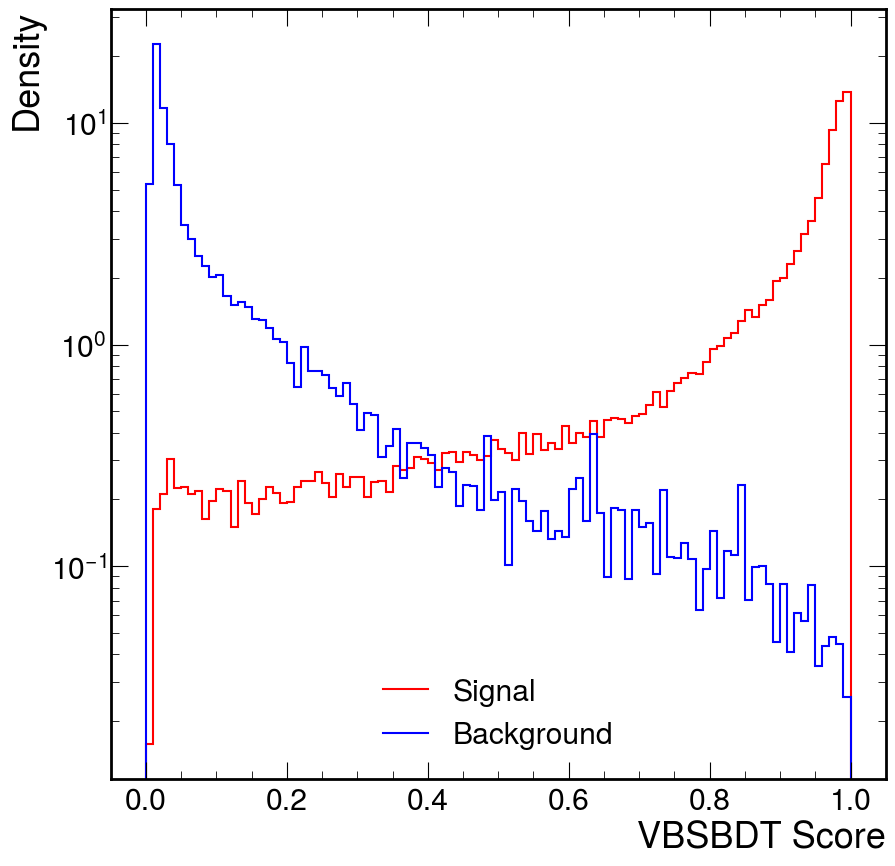

In [19]:
fig, ax = plt.subplots()
hep.histplot(h1, ax=ax, label="Signal", color="red", density=True)
hep.histplot(h2, ax=ax, label="Background", color="blue", density=True)

ax.legend()
ax.set_xlabel("VBSBDT Score")
ax.set_ylabel("Density")
ax.set_yscale("log")

In [67]:
df2.LHEScaleWeight_muR

AttributeError: 'DataFrame' object has no attribute 'LHEScaleWeight_muR'

In [71]:
df1.weight

0        0.000715
1        0.000965
2        0.001180
3        0.000418
4        0.000793
           ...   
10042    0.000680
10043    0.000442
10044    0.000352
10045    0.000401
10046    0.000706
Name: weight, Length: 10047, dtype: float64

In [70]:
df2.weight

0        0.006386
1        0.008761
2        0.010694
3        0.003758
4        0.006738
           ...   
10042    0.005966
10043    0.003975
10044    0.003151
10045    0.003601
10046    0.006385
Name: weight, Length: 10047, dtype: float64

In [20]:
df1.query("passCut9")

,event,xsec,lumi,nevents,sample_category,sample_type,sample_year,xsec_weight,isData,is2016,...,passCut2,passCut3,passCut4,passCut5,passCut6,passCut7,passCut8,passCut9,passCut8_cr,passCut9_cr
228,8,0.62,16.810,6.170698e+07,bkg,ttx,2016postVFP,0.000169,False,True,...,True,True,True,True,True,True,True,True,False,False
263,9,0.62,16.810,6.170698e+07,bkg,ttx,2016postVFP,0.000169,False,True,...,True,True,True,True,True,True,True,True,False,False
279,10,0.62,16.810,6.170698e+07,bkg,ttx,2016postVFP,0.000169,False,True,...,True,True,True,True,True,True,True,True,False,False
371,13,0.62,16.810,6.170698e+07,bkg,ttx,2016postVFP,0.000169,False,True,...,True,True,True,True,True,True,True,True,True,False
375,13,0.62,41.529,1.537978e+08,bkg,ttx,2017,0.000167,False,False,...,True,True,True,True,True,True,True,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3276832,499621748,365.34,59.700,1.406787e+11,bkg,ttbar,2018,0.000155,False,False,...,True,True,True,True,True,True,True,True,False,False
3276896,499697920,365.34,59.700,1.406787e+11,bkg,ttbar,2018,0.000155,False,False,...,True,True,True,True,True,True,True,True,True,False
3277140,499965447,365.34,59.700,1.406787e+11,bkg,ttbar,2018,0.000155,False,False,...,True,True,True,True,True,True,True,True,True,False
3277162,499984041,365.34,59.700,1.406787e+11,bkg,ttbar,2018,0.000155,False,False,...,True,True,True,True,True,True,True,True,False,False


In [11]:
BDT_CUT = 0.56
DNN_CUT = 0.92

df1.query("VBSBDTscore > @BDT_CUT & abcdnet_score > @DNN_CUT").weight.sum()

1.6936867572909398

In [ ]:
BDT_CUT = 0.56
DNN_CUT = 0.92
df3 = df1[(df1.VBSBDTscore > BDT_CUT) & (df1.abcdnet_score > DNN_CUT)]
df4 = df2[(df2.VBSBDTscore > BDT_CUT) & (df2.abcdnet_score > DNN_CUT)]

In [ ]:
df3.weight.sum()

In [ ]:
df4.weight.sum()

In [ ]:
df4[~df4.event.isin(df3.event)]

In [ ]:
df3.weight.sum(), df4.weight.sum()

In [ ]:
with uproot.open("/ceph/cms/store/user/aaarora/VBS_1lep_skims/sig_1lep_4ak4_or_1ak8_2ak4_v1/RunIISummer20UL16NanoAODAPVv9/VBSWZH_MJJ-100_4f_TuneCP5_13TeV-madgraph-pythia8/NANOAODSIM/106X_mcRun2_asymptotic_preVFP_v11-v2/4000/skimmed/output_merged2.root") as f:
    df = f.get("Events").arrays(["Jet_genJetIdx"], library="pd")

In [ ]:
df